<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Modulo_3/Aula_2_primeiras_previsoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o conteúdo anterior:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.ticker as ticker

In [2]:
## df_esp = estado de são paulo
## df_sp = cidade de são paulo

df_esp = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/dados_covid_sp.zip?raw=true", compression = "zip", sep = ";")

df_esp.loc[:,"datahora"] = pd.to_datetime(df_esp.loc[:,"datahora"], format = "%Y-%m-%d")

df_sp = df_esp.query("nome_munic == 'São Paulo'")

mpl.rcParams["font.size"] = 18

In [3]:
df = pd.DataFrame()

In [4]:
df.loc[:,"ds"] = df_sp.loc[:,"datahora"]
df.loc[:,"y"] = df_sp.loc[:,"casos_novos"]

df.head()

,ds,y
562,2020-02-25,0
1207,2020-02-26,0
1852,2020-02-27,0
2497,2020-02-28,1
3142,2020-02-29,0


In [5]:
from fbprophet import Prophet

In [6]:
m1 = Prophet()
m1

In [7]:
m1.fit(df) # sintaxe de como fazer fitting de modelos no python

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Sazonalidades diária e anual desabilitadas. Mas será que há detecção de sazonalidade semanal?

In [8]:
df_futuro = m1.make_future_dataframe(periods = 30)

In [9]:
df_futuro

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29
...,...
468,2021-06-07
469,2021-06-08
470,2021-06-09
471,2021-06-10


In [10]:
previsao = m1.predict(df_futuro) # dataframe com resultados do fitting do modelo

In [11]:
previsao #yhat = estimativa

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-114.303728,-738.409297,1548.590869,-114.303728,-114.303728,500.316952,500.316952,500.316952,500.316952,500.316952,500.316952,0.0,0.0,0.0,386.013224
1,2020-02-26,-96.932780,-751.459204,1688.054120,-96.932780,-96.932780,554.767711,554.767711,554.767711,554.767711,554.767711,554.767711,0.0,0.0,0.0,457.834930
2,2020-02-27,-79.561833,-576.103945,1834.089862,-79.561833,-79.561833,650.710000,650.710000,650.710000,650.710000,650.710000,650.710000,0.0,0.0,0.0,571.148167
3,2020-02-28,-62.190885,-1000.243440,1512.592550,-62.190885,-62.190885,368.442066,368.442066,368.442066,368.442066,368.442066,368.442066,0.0,0.0,0.0,306.251181
4,2020-02-29,-44.819937,-1174.032668,1113.712002,-44.819937,-44.819937,30.824737,30.824737,30.824737,30.824737,30.824737,30.824737,0.0,0.0,0.0,-13.995200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2021-06-07,3442.913185,1107.063656,3581.692386,3402.327579,3485.518509,-1142.791655,-1142.791655,-1142.791655,-1142.791655,-1142.791655,-1142.791655,0.0,0.0,0.0,2300.121530
469,2021-06-08,3453.150756,2722.080047,5140.855092,3409.839453,3498.135377,500.316952,500.316952,500.316952,500.316952,500.316952,500.316952,0.0,0.0,0.0,3953.467707
470,2021-06-09,3463.388326,2778.340367,5247.593756,3417.304212,3511.559685,554.767711,554.767711,554.767711,554.767711,554.767711,554.767711,0.0,0.0,0.0,4018.156037
471,2021-06-10,3473.625896,2906.760539,5320.520827,3424.580636,3523.636569,650.710000,650.710000,650.710000,650.710000,650.710000,650.710000,0.0,0.0,0.0,4124.335896


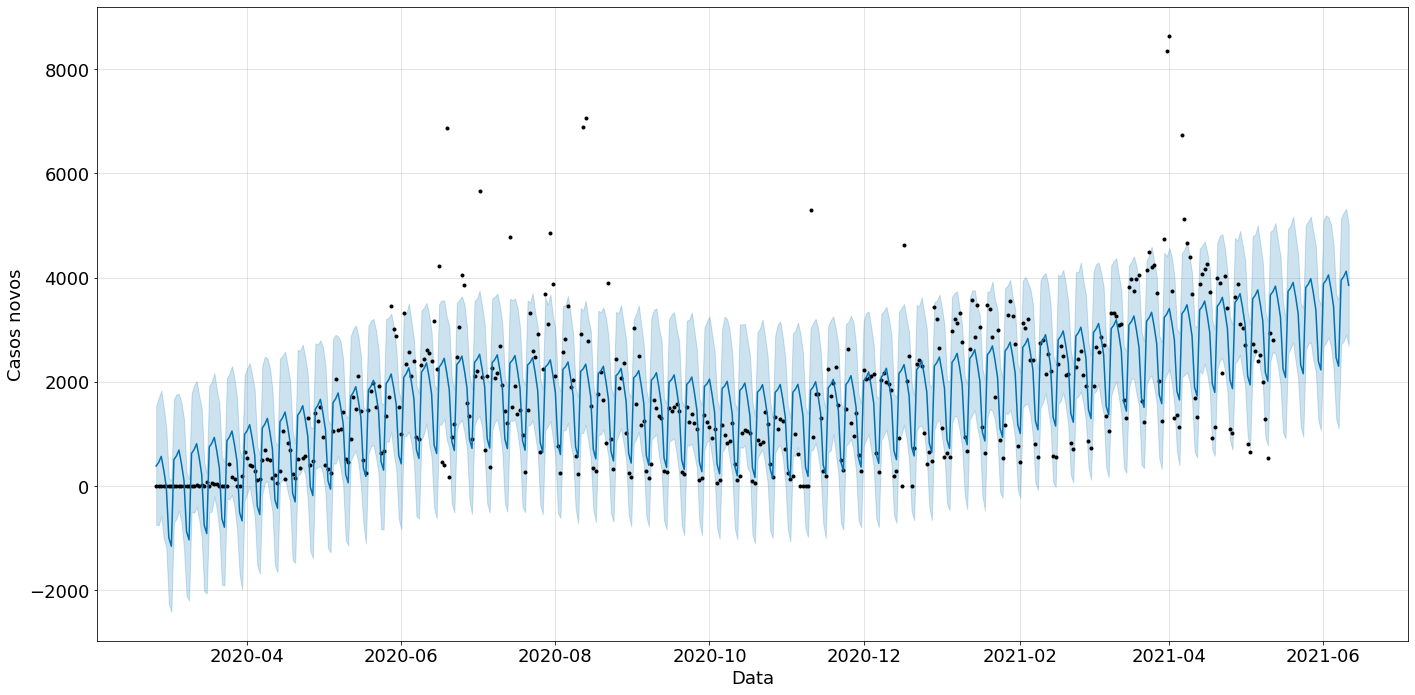

In [12]:
m1.plot(previsao, xlabel = "Data", ylabel = "Casos novos", figsize = (20,10)); #; evita replica da figura

Divisão de dados de treino e teste (em aula o Alan re-rodou o dataframe lá em cima, mas eu preferi deixar separadinho aqui embaixo):

In [13]:
df2 = pd.DataFrame()

In [14]:
df2.loc[:,"ds"] = df_sp.loc[:,"datahora"][:400]
df2.loc[:,"y"] = df_sp.loc[:,"casos_novos"][:400]

In [15]:
m2 = Prophet()

In [16]:
m2.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
df_futuro2 = m2.make_future_dataframe(periods = 43) # 43 dias não analisados

In [18]:
df_futuro2

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29
...,...
438,2021-05-08
439,2021-05-09
440,2021-05-10
441,2021-05-11


In [19]:
previsao2 = m2.predict(df_futuro2)

In [20]:
previsao2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
438,2021-05-08,3197.437397,2128.656120,4269.009001,3100.741928,3292.527749,59.114795,59.114795,59.114795,59.114795,59.114795,59.114795,0.0,0.0,0.0,3256.552192
439,2021-05-09,3208.463516,1286.408232,3355.564969,3107.148293,3308.183593,-868.181375,-868.181375,-868.181375,-868.181375,-868.181375,-868.181375,0.0,0.0,0.0,2340.282141
440,2021-05-10,3219.489634,1074.574070,3281.229768,3114.142082,3323.110721,-1042.354250,-1042.354250,-1042.354250,-1042.354250,-1042.354250,-1042.354250,0.0,0.0,0.0,2177.135384
441,2021-05-11,3230.515753,2655.272826,4807.861828,3120.980077,3336.823869,457.699352,457.699352,457.699352,457.699352,457.699352,457.699352,0.0,0.0,0.0,3688.215105
442,2021-05-12,3241.541871,2625.351400,4775.644004,3127.231691,3352.205619,456.859942,456.859942,456.859942,456.859942,456.859942,456.859942,0.0,0.0,0.0,3698.401813


In [21]:
df2_teste = pd.DataFrame()
df2_teste.loc[:,"ds"] = df_sp.loc[:,"datahora"][400:]
df2_teste.loc[:,"y"] = df_sp.loc[:,"casos_novos"][400:]

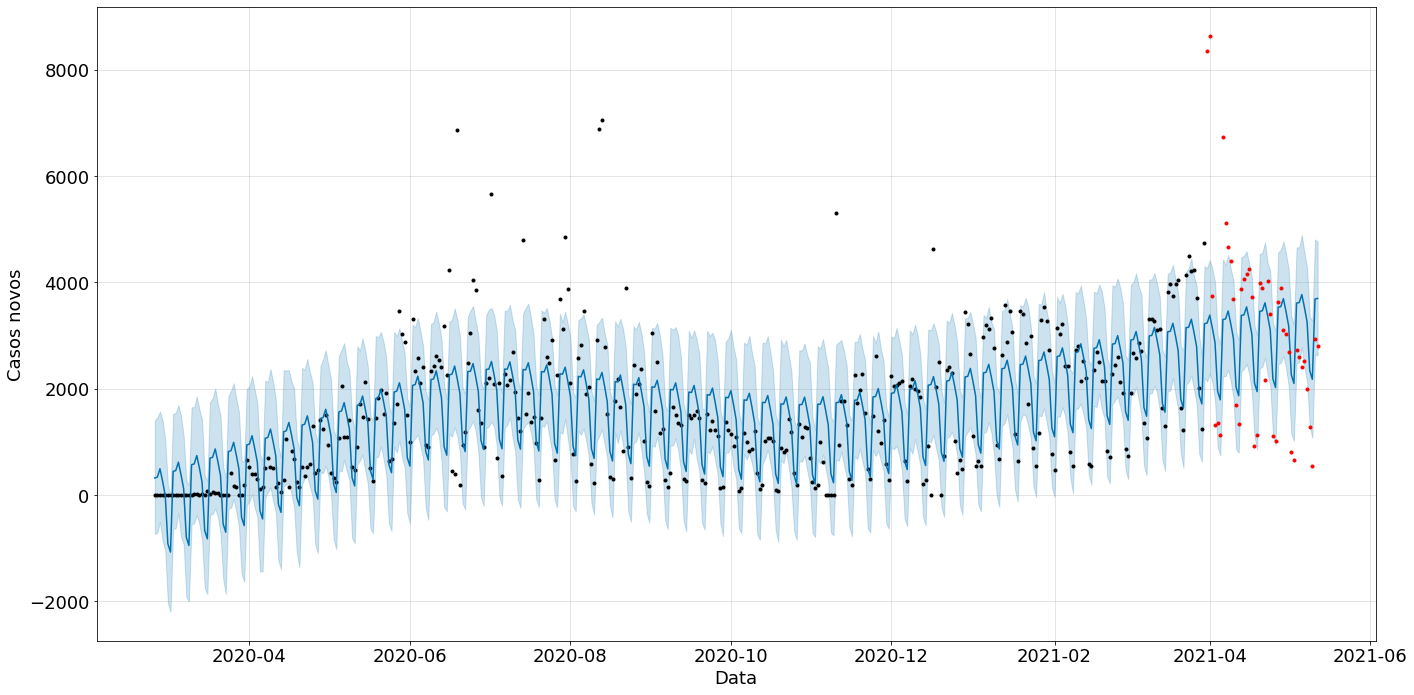

In [22]:
m2.plot(previsao2, xlabel = "Data", ylabel = "Casos novos", figsize = (20,10));
plt.plot(df2_teste.loc[:,"ds"], df2_teste.loc[:,"y"], ".r") # estudar o que é .r

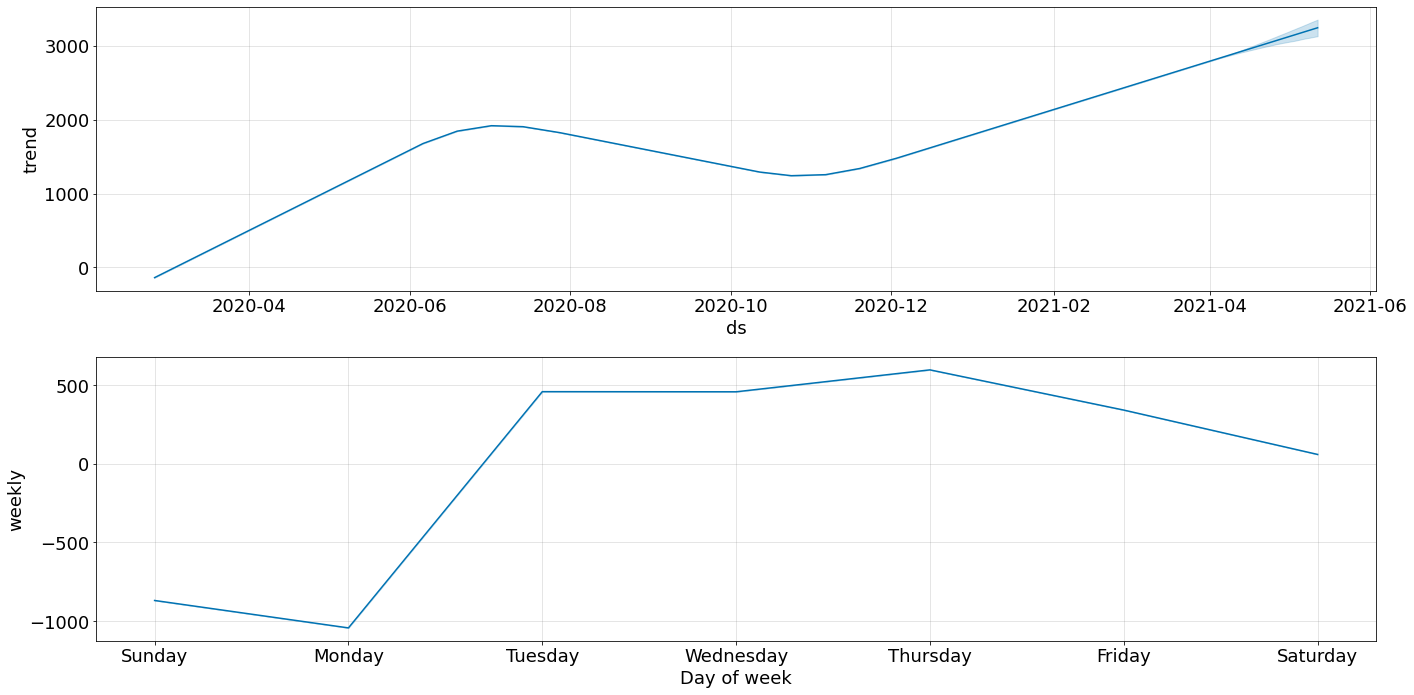

In [23]:
m2.plot_components(previsao2, figsize = (20,10));

## Desafio 01 - Mudar os períodos de previsão

## Desafio 02 - Explorar a documentação do prophet

## Desafio 03 - Melhorar os gráficos (pesquisar a doc do Prophet: que base ele usa, matplotlib?)